# Cyrillic OCR with PaddleOCR

This project implements Optical Character Recognition (OCR) for Cyrillic text using PaddleOCR. The system supports training, inference, and evaluation of text recognition models for Russian and other Cyrillic-based languages.

## Project Structure

```
OCR/
├── PaddleOCR/                # PaddleOCR framework
├── model/                    # Pre-trained models
│   ├── cyrillic_PP-OCRv3_rec_infer/
│   └── cyrillic_PP-OCRv3_rec_train/
├── inference/                # Exported inference models
│   └── cyrillic_PP-OCRv3_rec/
├── data/                     # Dataset
│   ├── rec/
│   │   ├── train/           # Training images
│   │   ├── test/            # Test images
│   │   ├── rec_gt_train.txt # Training ground truth
│   │   └── rec_gt_test.txt  # Test ground truth
│   └── det/                  # Detection dataset
└── scripts/                  # Inference and utility scripts
```

## Features

- **Cyrillic Text Recognition**: Specialized OCR for Russian and other Cyrillic scripts
- **Model Training**: Scripts for training custom OCR models
- **Model Export**: Tools to export trained models for inference
- **Batch Inference**: Process multiple images and evaluate accuracy
- **GPU Support**: Accelerated training and inference

## Setup & Installation

1. **Install Dependencies**:
   ```bash
   pip install paddlepaddle-gpu paddleocr opencv-python matplotlib numpy
   ```

2. **Download Pre-trained Models**:
   - Cyrillic recognition model: [cyrillic_ppocr_mobile_v2.0_rec_infer](https://paddleocr.bj.bcebos.com/dygraph_v2.0/multilingual/cyrillic_ppocr_mobile_v2.0_rec_infer.tar)
   - Training model: [cyrillic_ppocr_mobile_v2.0_rec_train](https://paddleocr.bj.bcebos.com/dygraph_v2.0/multilingual/cyrillic_ppocr_mobile_v2.0_rec_train.tar)

3. **Clone PaddleOCR Repository**:
   ```bash
   git clone https://github.com/PaddlePaddle/PaddleOCR.git
   ```

## Usage

### 1. Check Environment Setup

Run the first notebook cell to verify GPU and system configurations:
```python
import torch
gpu_stats = torch.cuda.get_device_properties(0)
print(f"GPU = {gpu_stats.name}. Max memory = {max_memory} GB.")
```

### 2. Verify PaddlePaddle Installation

```python
import paddle
print(paddle.__version__)
print(paddle.is_compiled_with_cuda())
paddle.utils.run_check()
```

### 3. Perform OCR Recognition

```python
from paddleocr import PaddleOCR

ocr = PaddleOCR(
    use_gpu=True,
    rec_model_dir='/path/to/model',
    rec_char_dict_path='/path/to/dict/cyrillic_dict.txt',
    lang='ru'
)

result = ocr.ocr('image.jpg', cls=False, det=False)
print(result)
```

### 4. Train Custom Model

```bash
cd /path/to/PaddleOCR/
python tools/train.py \
    -c configs/rec/PP-OCRv3/multi_language/cyrillic_PP-OCRv3_rec.yml \
    -o Global.pretrained_model=/path/to/pretrained/model
```

### 5. Export Model for Inference

```bash
python tools/export_model.py \
    -c configs/rec/PP-OCRv3/multi_language/cyrillic_PP-OCRv3_rec.yml \
    -o Global.pretrained_model=./output/v3_cyrillic_mobile/best_accuracy \
    Global.save_inference_dir=./inference/cyrillic_PP-OCRv3_rec
```

### 6. Batch Inference and Evaluation

Run the inference script to process test images and evaluate accuracy:
```bash
python inference_script.py
```

## Configuration Options

### Recognition Model Parameters

- `use_gpu`: Enable/disable GPU acceleration
- `rec_model_dir`: Path to recognition model
- `rec_char_dict_path`: Path to character dictionary
- `lang`: Language code ('ru' for Russian)
- `rec_image_shape`: Input image dimensions (channels, height, width)

### Training Parameters

Configure training options in `cyrillic_PP-OCRv3_rec.yml`:
- Learning rate
- Batch size
- Number of epochs
- Data augmentation
- Model architecture

## Model Details

- **Architecture**: PP-OCRv3 with SVTR head
- **Input Shape**: 3 × 48 × 320 (C×H×W)
- **Character Set**: Cyrillic alphabet (Russian)
- **Dictionary Path**: `ppocr/utils/dict/cyrillic_dict.txt`

## Performance

- **Accuracy**: Varies by dataset and image quality
- **Speed**: ~XX ms per image on GPU (depends on hardware)
- **Model Size**: ~XX MB

## References

- [PaddleOCR GitHub](https://github.com/PaddlePaddle/PaddleOCR)
- [Multilingual Models Documentation](https://github.com/PaddlePaddle/PaddleOCR/blob/main/doc/doc_en/multi_languages_en.md)
- [Cyrillic Model Configuration](https://github.com/PaddlePaddle/PaddleOCR/blob/main/configs/rec/PP-OCRv3/multi_language/cyrillic_PP-OCRv3_rec.yml)


In [ ]:
# Check GPU Status and Memory
import torch

# Show current GPU memory stats
gpu_stats = torch.cuda.get_device_properties(0)
start_gpu_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
max_memory = round(gpu_stats.total_memory / 1024 / 1024 / 1024, 3)

print(f"GPU = {gpu_stats.name}. Max memory = {max_memory} GB.")
print(f"{start_gpu_memory} GB of memory reserved.")

# Verify Paddle Installation and CUDA Support
import paddle

# Check Paddle version and CUDA compatibility
print(f"Paddle version: {paddle.__version__}")
print(f"CUDA enabled: {paddle.is_compiled_with_cuda()}")
paddle.utils.run_check()

# Text Recognition using PaddleOCR with Cyrillic Model
from paddleocr import PaddleOCR

# Initialize PaddleOCR with Cyrillic recognition model
ocr = PaddleOCR(
    use_gpu=False,  # Try CPU first to eliminate CUDA issues
    rec_model_dir="/home/ubuntu/OCR/model/cyrillic_PP-OCRv3_rec_infer",
    rec_char_dict_path="/home/ubuntu/OCR/PaddleOCR/ppocr/utils/dict/cyrillic_dict.txt",
    lang="ru",  # Russian language for Cyrillic characters
)

# Run OCR on a test image (recognition only, no detection)
result = ocr.ocr("/home/ubuntu/OCR/data/rec/test/1.jpg", cls=False, det=False)
print(result)

GPU = Tesla T4. Max memory = 14.568 GB.
0.0 GB of memory reserved.


/home/ubuntu/ocr_venv_py38/lib/python3.8/site-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)


Paddle version: 3.0.0-rc1
CUDA enabled: True
Running verify PaddlePaddle program ... 


I0403 15:04:54.709229 69200 pir_interpreter.cc:1508] New Executor is Running ...
W0403 15:04:54.712354 69200 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 7.5, Driver API Version: 12.4, Runtime API Version: 11.7
W0403 15:04:54.713348 69200 gpu_resources.cc:164] device: 0, cuDNN Version: 8.9.
I0403 15:04:59.705333 69200 pir_interpreter.cc:1531] pir interpreter is running by multi-thread mode ...


PaddlePaddle works well on 1 GPU.
PaddlePaddle is installed successfully! Let's start deep learning with PaddlePaddle now.
[2025/04/03 15:05:02] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/home/ubuntu/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/home/ubuntu/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_

In [ ]:
# # Train Cyrillic Recognition Model
# # Change to PaddleOCR directory and run training with pre-trained model
# !cd /home/ubuntu/OCR/PaddleOCR/
# !python /home/ubuntu/OCR/PaddleOCR/tools/train.py \
#     -c /home/ubuntu/OCR/PaddleOCR/configs/rec/PP-OCRv3/multi_language/cyrillic_PP-OCRv3_rec.yml \
#     -o Global.pretrained_model=/home/ubuntu/OCR/model/cyrillic_PP-OCRv3_rec_train/best_accuracy

In [3]:
# Export Trained Model for Inference
!cd /home/ubuntu/OCR/PaddleOCR/
!python /home/ubuntu/OCR/PaddleOCR/tools/export_model.py \
    -c /home/ubuntu/OCR/PaddleOCR/configs/rec/PP-OCRv3/multi_language/cyrillic_PP-OCRv3_rec.yml \
    -o Global.pretrained_model=./output/v3_cyrillic_mobile/best_accuracy \
    Global.save_inference_dir=./inference/cyrillic_PP-OCRv3_rec

# Run Inference with Exported Model
!cd /home/ubuntu/OCR/PaddleOCR/
!python /home/ubuntu/OCR/PaddleOCR/tools/infer/predict_rec.py \
    --image_dir=/home/ubuntu/OCR/data/rec/test1/Гемоглобин_russia_combined1_0.jpg \
    --rec_model_dir=/home/ubuntu/OCR/inference/cyrillic_PP-OCRv3_rec \
    --rec_char_dict_path=/home/ubuntu/OCR/PaddleOCR/ppocr/utils/dict/cyrillic_dict.txt \
    --rec_image_shape="3, 48, 320"

/home/ubuntu/ocr_venv_py38/lib/python3.8/site-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
[2025/04/03 15:08:11] ppocr WARNING: Skipping import of the encryption module.
W0403 15:08:12.691797 69276 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 7.5, Driver API Version: 12.4, Runtime API Version: 11.7
W0403 15:08:12.698235 69276 gpu_resources.cc:164] device: 0, cuDNN Version: 8.9.
[2025/04/03 15:08:19] ppocr INFO: load pretrain successful from ./output/v3_cyrillic_mobile/best_accuracy
[2025/04/03 15:08:19] ppocr INFO: Export inference config file to ./inference/cyrillic_PP-OCRv3_rec/inference.yml
Skipping import of the encryption module
I0403 15:08:21.361071 69276 program_interpreter.cc:243] New Executor is Running.
[2025

In [4]:
# Cell 7: Test Recognition with Exported Model using PaddleOCR API
from paddleocr import PaddleOCR

# Path to the exported inference model
model_path = "/home/ubuntu/OCR/inference/cyrillic_PP-OCRv3_rec"
# Alternative path to pre-trained model
# model_path = '/home/ubuntu/OCR/model/cyrillic_PP-OCRv3_rec_infer'

# Initialize OCR with GPU
ocr = PaddleOCR(
    use_gpu=True,  # Using GPU for faster inference
    rec_model_dir=model_path,
    rec_char_dict_path="/home/ubuntu/OCR/PaddleOCR/ppocr/utils/dict/cyrillic_dict.txt",
    lang="ru",  # Russian language
)

# Run recognition on test image
result = ocr.ocr("/home/ubuntu/OCR/data/rec/test/1.jpg", cls=False, det=False)
print(result)

[2025/04/03 15:08:48] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/home/ubuntu/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/home/ubuntu/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_score_thresh=

Loaded 163 characters and 6 ground truth labels
Found 6 images in test folder
Processing images with GPU...
✗ 0.jpg: Predicted 'ьгэуп' but expected 'ИНВИТРО' (conf: 0.96)
✗ 1.jpg: Predicted 'иооб' but expected 'АННА' (conf: 0.96)
✗ 2.jpg: Predicted 'Дпм' but expected 'Пол' (conf: 0.93)
✗ 3.jpg: Predicted 'лж' but expected 'Жен' (conf: 0.97)
✗ 4.jpg: Predicted 'Cпиqбтуё' but expected 'Возраст' (conf: 0.97)
✗ 5.jpg: Predicted 'иедпе' but expected '31 год' (conf: 0.99)

===== RESULTS =====
Total images processed: 6
Correctly predicted: 0
Accuracy: 0.00%

===== DISPLAYING SOME INCORRECT PREDICTIONS =====


--- Running analysis [ir_graph_build_pass]
--- Running analysis [ir_analysis_pass]
--- Running IR pass [map_op_to_another_pass]
--- Running IR pass [is_test_pass]
--- Running IR pass [simplify_with_basic_ops_pass]
--- Running IR pass [delete_quant_dequant_linear_op_pass]
--- Running IR pass [delete_weight_dequant_linear_op_pass]
--- Running IR pass [sparse_conv_optim_pass]
--- Running IR pass [constant_folding_pass]
--- Running IR pass [silu_fuse_pass]
--- Running IR pass [conv_bn_fuse_pass]
--- Running IR pass [conv_eltwiseadd_bn_fuse_pass]
--- Running IR pass [embedding_eltwise_layernorm_fuse_pass]
--- Running IR pass [multihead_matmul_fuse_pass_v2]
--- Running IR pass [vit_attention_fuse_pass]
--- Running IR pass [fused_multi_transformer_encoder_pass]
--- Running IR pass [fused_multi_transformer_decoder_pass]
--- Running IR pass [fused_multi_transformer_encoder_fuse_qkv_pass]
--- Running IR pass [fused_multi_transformer_decoder_fuse_qkv_pass]
--- Running IR pass [multi_devices_fused

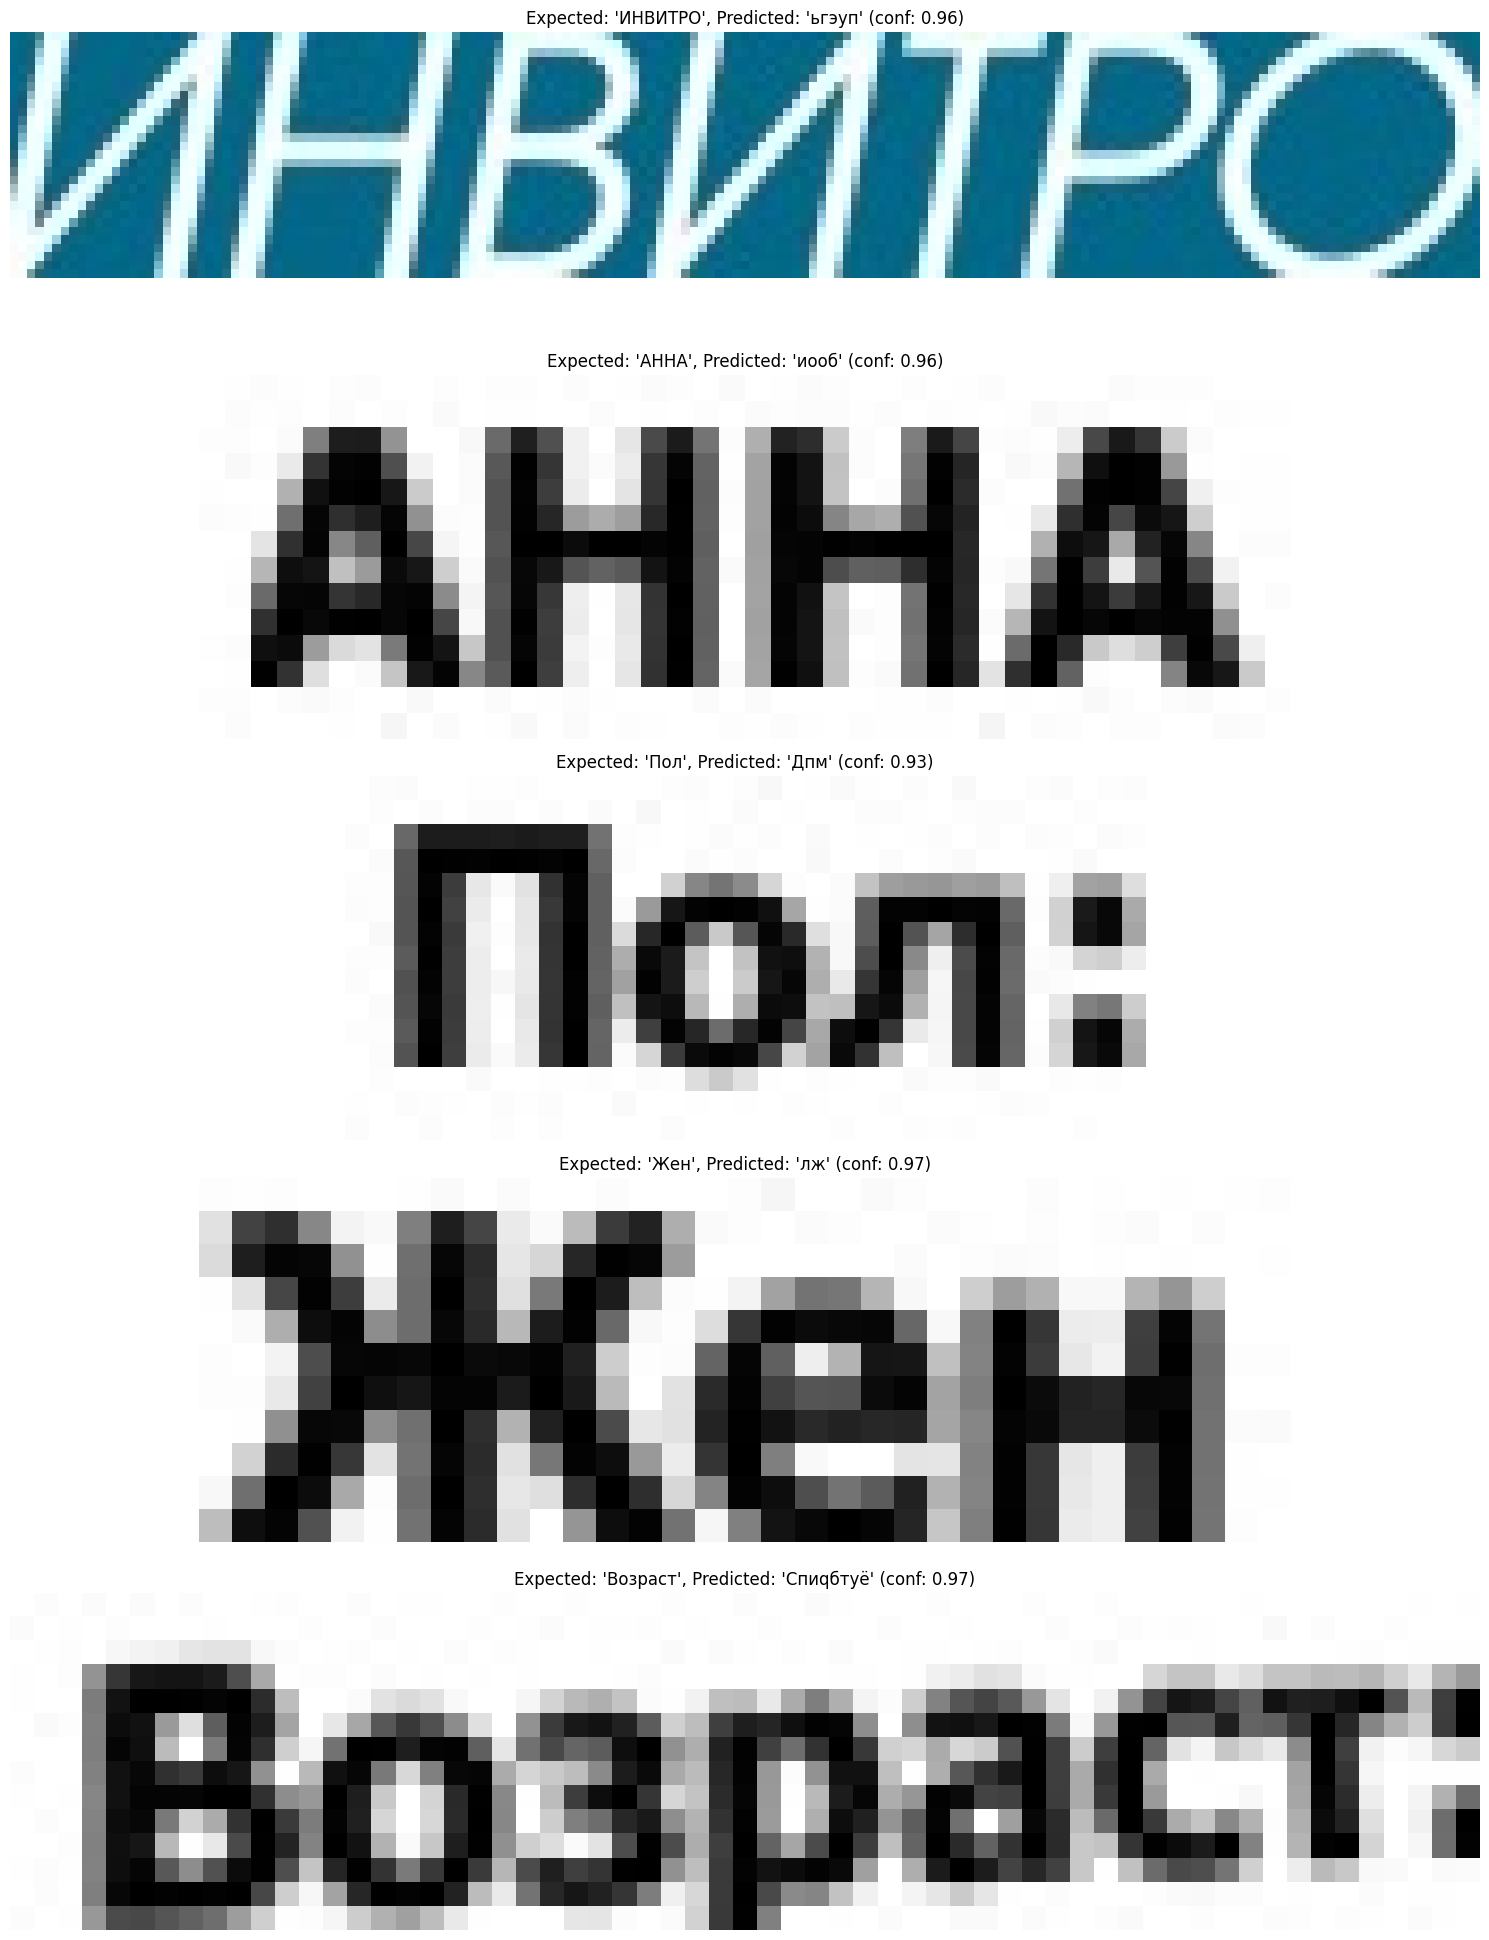

In [5]:
# Cell 8: Full Inference and Evaluation Script
import os
import numpy as np
import cv2
import paddle
from paddle import inference
from glob import glob
import matplotlib.pyplot as plt

# Configuration - Edit these paths as needed
MODEL_PATH = "/home/ubuntu/OCR/inference/cyrillic_PP-OCRv3_rec"
DICT_PATH = "/home/ubuntu/OCR/PaddleOCR/ppocr/utils/dict/cyrillic_dict.txt"
TEST_FOLDER = "/home/ubuntu/OCR/data/rec/test"
GROUND_TRUTH_FILE = "/home/ubuntu/OCR/data/rec/rec_gt_test.txt"
IMAGE_SHAPE = "3, 48, 320"  # Channels, Height, Width


# Load character dictionary
def load_character_dict(dict_path):
    with open(dict_path, "rb") as f:
        lines = f.readlines()
        character_dict = {}
        for idx, line in enumerate(lines):
            line = line.decode("utf-8").strip("\n").strip("\r\n")
            character_dict[idx] = line
    return character_dict


# Load ground truth
character_dict = load_character_dict(DICT_PATH)
gt_dict = {}
with open(GROUND_TRUTH_FILE, "r", encoding="utf-8") as f:
    for line in f:
        parts = line.strip().split("\t")
        if len(parts) >= 2:
            image_path = parts[0]
            image_name = os.path.basename(image_path)
            text = parts[1]
            gt_dict[image_name] = text

print(f"Loaded {len(character_dict)} characters and {len(gt_dict)} ground truth labels")

# Setup predictor
config = inference.Config(
    os.path.join(MODEL_PATH, "inference.pdmodel"),
    os.path.join(MODEL_PATH, "inference.pdiparams"),
)
config.enable_use_gpu(500, 0)  # Using GPU with 500MB memory
predictor = inference.create_predictor(config)

# Get input and output tensors
input_names = predictor.get_input_names()
input_tensor = predictor.get_input_handle(input_names[0])
output_names = predictor.get_output_names()
output_tensor = predictor.get_output_handle(output_names[0])

# Get image files
extensions = ["jpg", "jpeg", "png", "bmp", "tiff"]
image_files = []
for ext in extensions:
    image_files.extend(glob(os.path.join(TEST_FOLDER, f"*.{ext}")))
    image_files.extend(glob(os.path.join(TEST_FOLDER, f"*.{ext.upper()}")))
image_files = sorted(image_files)

print(f"Found {len(image_files)} images in test folder")

# Results tracking
total = 0
correct = 0
incorrect_samples = []

# Process each image
print(f"Processing images with GPU...")
for image_file in image_files[
    :20
]:  # Limit to first 20 images for faster notebook execution
    # Get ground truth
    image_name = os.path.basename(image_file)
    gt_text = gt_dict.get(image_name, "")

    if not gt_text:
        print(f"Warning: No ground truth found for {image_name}")
        continue

    # Read and preprocess image
    img = cv2.imread(image_file)
    if img is None:
        print(f"Error reading image: {image_file}")
        continue

    # Preprocess image
    img_c, img_h, img_w = [int(v) for v in IMAGE_SHAPE.split(",")]
    img_display = img.copy()  # Save a copy for display
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (img_w, img_h))
    img = np.transpose(img, (2, 0, 1))  # HWC to CHW
    img = img.astype("float32")
    img = img / 255.0
    img = img - 0.5
    img = img / 0.5
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Run inference
    input_tensor.copy_from_cpu(img)
    predictor.run()
    output = output_tensor.copy_to_cpu()

    # Process prediction (CTC decoding)
    pred_indices = np.argmax(output[0], axis=1)

    # Remove duplicate indices
    keep_indices = []
    prev_index = None
    for idx in pred_indices:
        if idx != prev_index:
            keep_indices.append(idx)
            prev_index = idx

    # Remove blank label (usually index 0)
    non_blank_indices = [idx for idx in keep_indices if idx > 0]

    # Convert indices to characters
    characters = [character_dict.get(idx, "") for idx in non_blank_indices]
    pred_text = "".join(characters)
    confidence = float(np.mean(np.max(output[0], axis=1)))

    # Update stats
    total += 1
    if pred_text == gt_text:
        correct += 1
        print(f"✓ {image_name}: '{pred_text}' (conf: {confidence:.2f})")
    else:
        incorrect_samples.append(
            {
                "image": image_name,
                "predicted": pred_text,
                "expected": gt_text,
                "confidence": confidence,
                "image_data": img_display,
            }
        )
        print(
            f"✗ {image_name}: Predicted '{pred_text}' but expected '{gt_text}' (conf: {confidence:.2f})"
        )

# Calculate accuracy
accuracy = correct / total if total > 0 else 0

# Print results
print("\n===== RESULTS =====")
print(f"Total images processed: {total}")
print(f"Correctly predicted: {correct}")
print(f"Accuracy: {accuracy:.2%}")

# Display some incorrect predictions with images
if incorrect_samples and len(incorrect_samples) > 0:
    print("\n===== DISPLAYING SOME INCORRECT PREDICTIONS =====")
    num_to_display = min(5, len(incorrect_samples))

    plt.figure(figsize=(15, 4 * num_to_display))
    for i in range(num_to_display):
        sample = incorrect_samples[i]
        plt.subplot(num_to_display, 1, i + 1)
        plt.imshow(cv2.cvtColor(sample["image_data"], cv2.COLOR_BGR2RGB))
        plt.title(
            f"Expected: '{sample['expected']}', Predicted: '{sample['predicted']}' (conf: {sample['confidence']:.2f})"
        )
        plt.axis("off")

    plt.tight_layout()
    plt.show()